# OBESITY BASED ON EATING HABITS & PHYSICAL CONDITIONS

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

The dataset has 2111 records and 17 features. The records are labeled with the class variable "NObesity" (Obesity Level) that allows classification in 7 groups: "Insufficient Weight", "Normal Weight", "Overweight Level I", "Overweight Level II", "Obesity Type I", "Obesity Type II" and "Obesity Type III". The dataset authors note that 23% of the records were collected directly from users through a web platform, and the remaining 77% were generated synthetically with Weka tool and SMOTE filter.

Eating habits, physical activity, and genes are factors which affect person's obesity predisposition. The task here is to explore the dataset, and to find a decent model that would be capable to tell if someone is overweight or obese, or his or her body fits into the normal (health) range. On the other hand, an attempt was made to cluster the data based on all features (predictors). Both - classification and clustering - tasks are described after data exploration.

In [2]:
# Load the dataset using pandas
ob_df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv', header=0)
ob_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
# Print first 5 records
ob_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Print last 5 records
ob_df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


## Features & Descriptions

Category	Feature Name	Description	Variable Type

Target Variable	NObesity	Based on BMI	Categorical

Eating Habits	FAVC	Frequent consumption of high caloric food	Categorical

Eating Habits	FCVC	Frequency of consumption of vegetables	Ordinal

Eating Habits	NCP	Number of main meals	Ordinal

Eating Habits	CAEC	Consumption of food between meals	Ordinal

Eating Habits	CH20	Consumption of water daily	Ordinal

Eating Habits	CALC	Consumption of alcohol	Ordinal

Physical Conditioning	SCC	Calories consumption monitoring	Categorical

Physical Conditioning	FAF	Pysical activity frequency	Ordinal

Physical Conditioning	TUE	Time using technology devices	Ordinal

Physical Conditioning	MTRANS	Transportation used	Categorical

Physical Conditioning	SMOKE	Smokes Yes or No	Categorical

Responder Charateristics	Family History with Overweight	Yes or No	Categorical

Responder Charateristics	Gender	Gender is Male or Female	Categorical

# Data Preprocessing

### 1. Exploratory Data Analysis

In [5]:
# Check the dimensions of the dataset
ob_df.shape

(2111, 17)

In [6]:
# Show information of the dataset
ob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
ob_df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


The data contains 2111 records with 17 columns

The data loads as text and float objects for most of the objects. However we know that some are float, categorical and ordinal
All of the records are unique and contain no null values.

The survey data is distinguishable from the synthazied data based on floats used for ordinal variables

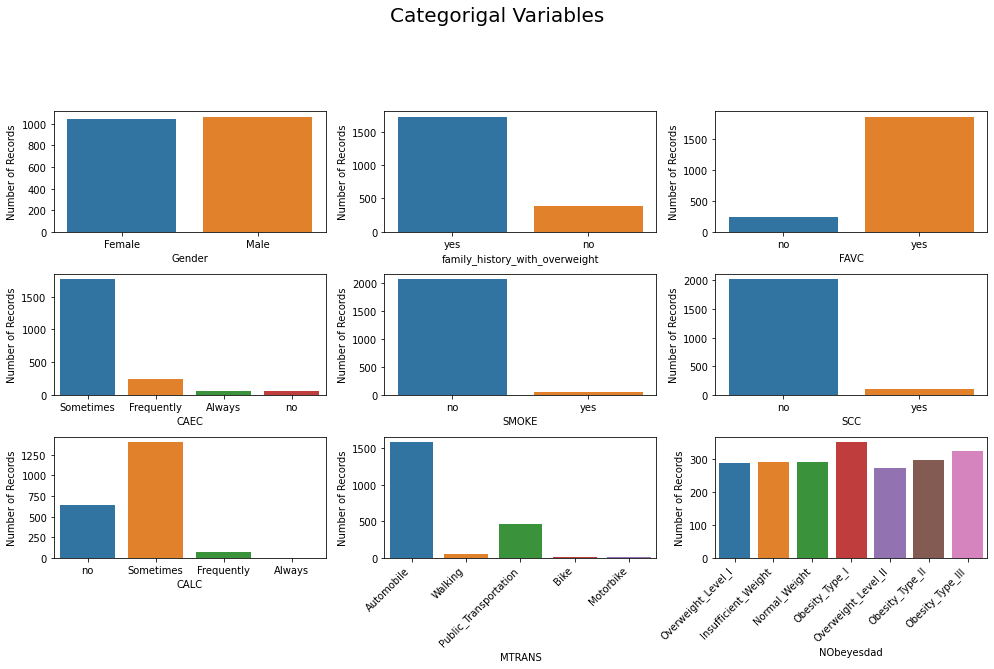

In [8]:
# Categorical features visualization
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

fig, ax = plt.subplots(3, 3, figsize = (15, 10))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(ob_df[col], ax = subplot)
    
    if col == "MTRANS":
        sns.countplot(ob_df[col], ax = subplot)
        subplot.set_xticklabels(rotation = 45, horizontalalignment = 'right', labels = list(set(ob_df.MTRANS)))        
        subplot.yaxis.label.set_text("Number of Records")
    elif col == "NObeyesdad":
        sns.countplot(ob_df[col], ax = subplot)
        subplot.set_xticklabels(rotation = 45, horizontalalignment = 'right', labels = list(set(ob_df.NObeyesdad)))
        subplot.yaxis.label.set_text("Number of Records")
    else:
        sns.countplot(ob_df[col], ax = subplot)  
        subplot.yaxis.label.set_text("Number of Records")
        
# Show figure & plots
fig.suptitle("Categorigal Variables", fontsize = 20)
plt.tight_layout(pad = 5, w_pad = 0.0, h_pad = 1)
plt.show()

### 2. Missing Value Detection

In [9]:
# To check if there is any missing values for each feature in the 'ob_df' dataframe.

ob_df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

From the above there is no missing values in the dataset.

### 3. Exploring Numerical and Categorical Features 

In [10]:
# To get a subset of the DataFrame’s columns based on the column dtypes as numbers
numeric_features = ob_df.select_dtypes(include = [np.number])

print(numeric_features.columns)
numeric_features

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


In [11]:
# To get a subset of the DataFrame’s columns based on the column dtypes as categories
cat_features = ob_df.select_dtypes(include = [np.object])

print(cat_features.columns)
cat_features

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


### 4. Outlier Detection and Handling

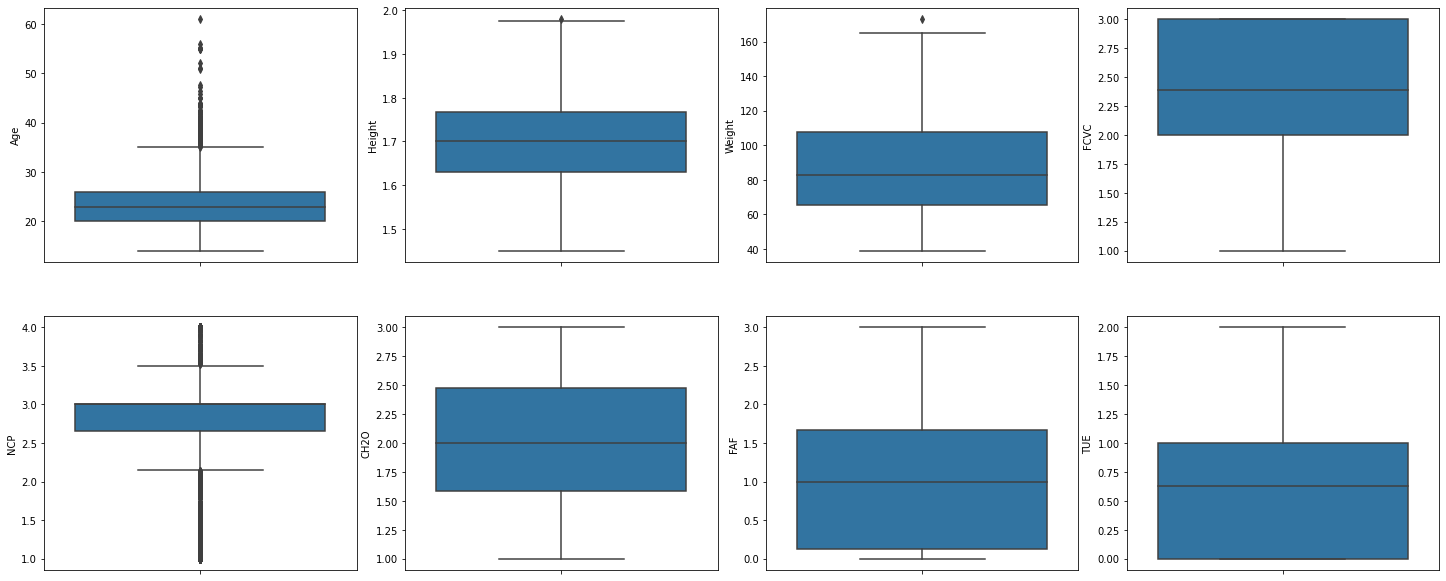

In [12]:
# Box plot of numeric features
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 8))

idx = 0
axs = axs.flatten()
for k, v in numeric_features.items():
    sns.boxplot(y = k, data = numeric_features, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

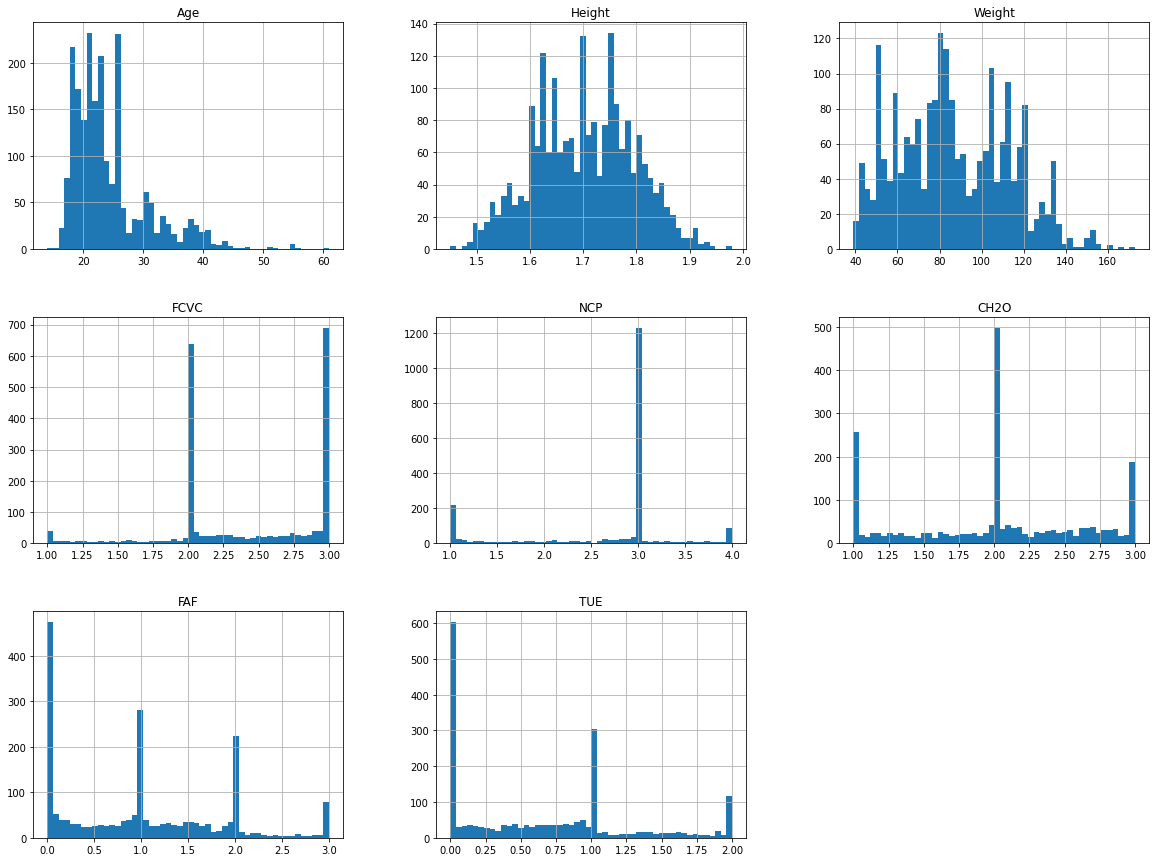

In [13]:
# Approximate data distribution

ob_df.hist(bins = 50, figsize = (20, 15))
plt.show()

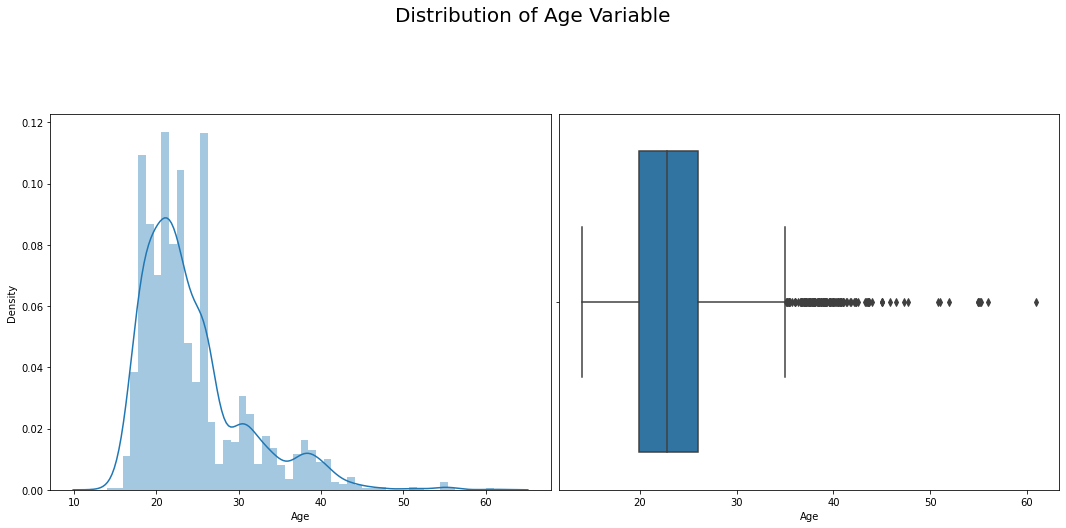

In [14]:
# Distribution of numeric feature: age
fig = plt.figure(figsize = (16, 8))

# Distplot
ax1 = fig.add_subplot(121)
sns.distplot(numeric_features["Age"], kde = True)
ax1 = fig.add_subplot(122)
sns.boxplot(numeric_features.Age)

fig.suptitle("Distribution of Age Variable", fontsize=20)
plt.tight_layout(pad = 5, w_pad = 0.5, h_pad = .1)
plt.show()

### Outlier Removal:

Using the IQR_upper and IQR_lower values obtained from quartiles and inter-quartile range

1. any outliers greater than IQR_upper are updated to be equal to IQR_upper
2. any outliers lesser than IQR_lower are updated to be equal to IQR_lower

Here, no outliers have been removed from the numeric_features dataset to prevent the loss of data as we have only 2111 observations to cluster

Before Removing Outliers


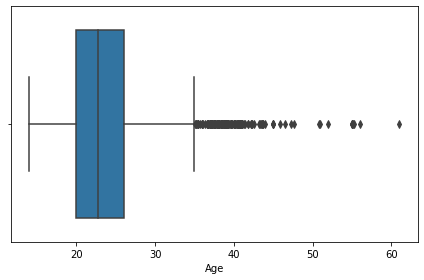

After Removing Outliers


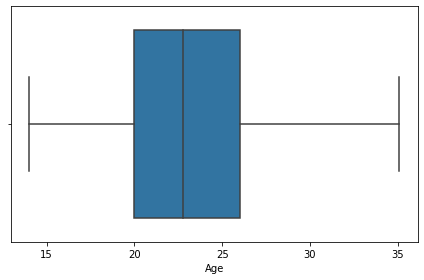

Before Removing Outliers


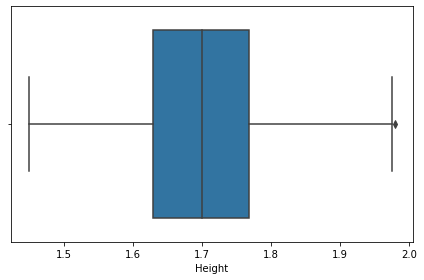

After Removing Outliers


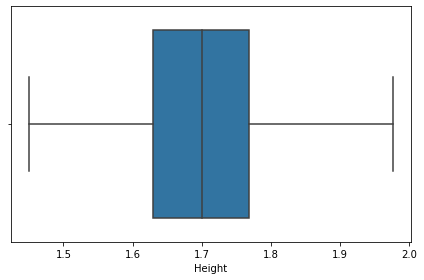

Before Removing Outliers


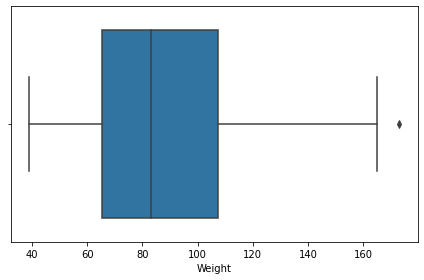

After Removing Outliers


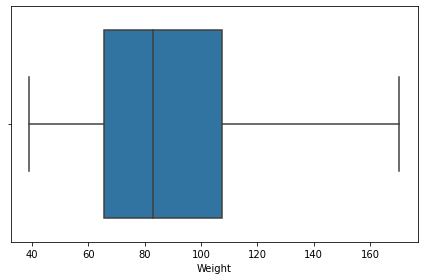

Before Removing Outliers


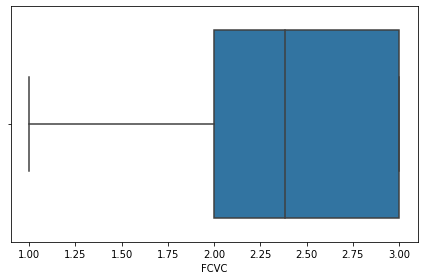

After Removing Outliers


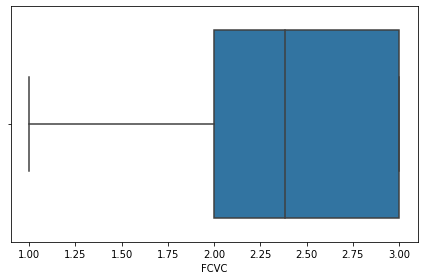

Before Removing Outliers


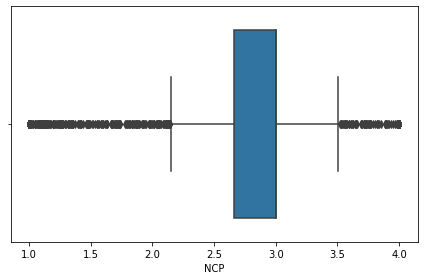

After Removing Outliers


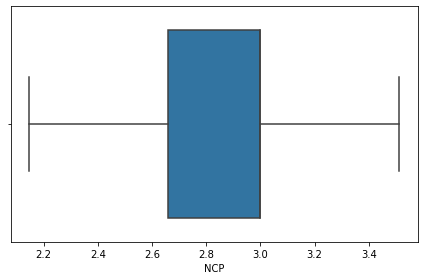

Before Removing Outliers


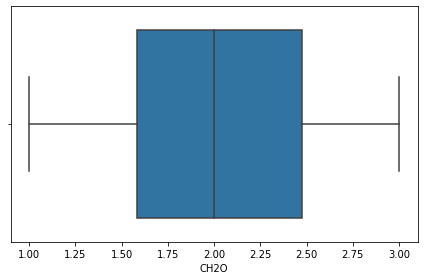

After Removing Outliers


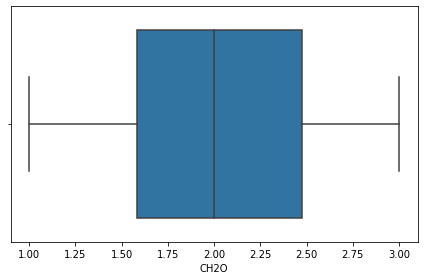

Before Removing Outliers


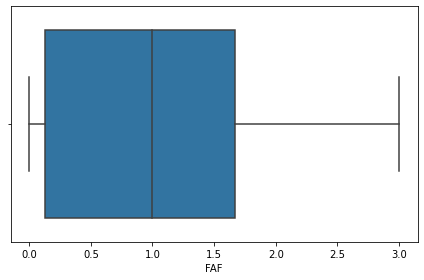

After Removing Outliers


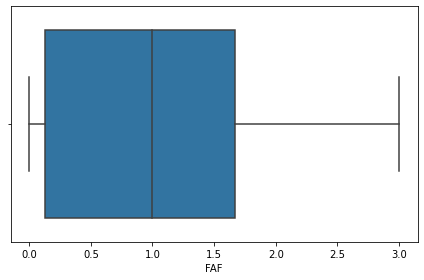

Before Removing Outliers


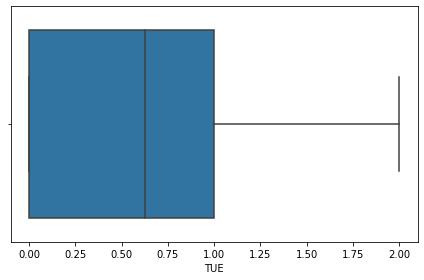

After Removing Outliers


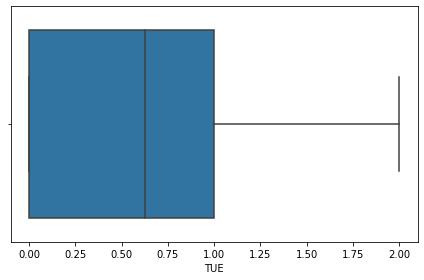

In [15]:
def remove_outliers(x):
    # Storing names of columns in Column_Names
    Column_Names = x.columns
    
    # Iterating through Column_Names using try and except for distinguishing between numerical and categorical columns
    for j in Column_Names:
        try:
            
            print('Before Removing Outliers')
            # Visualisation of outliers
            a = sns.boxplot(data = x, x = x[j])
            plt.tight_layout()
            plt.show()
            xy = x[j]
            mydata = pd.DataFrame()
            updated = []
            Q1, Q3 = np.percentile(xy, [25, 75])
            IQR = Q3 - Q1
            minimum = Q1 - 1.5 * IQR
            maximum = Q3 + 1.5 * IQR
            for i in xy:
                if(i > maximum):
                    i = maximum
                    updated.append(i)
                elif(i < minimum):
                    i = minimum
                    updated.append(i)
                else:
                    updated.append(i)
            x[j] = updated
            
            print('After Removing Outliers')
            # Visualising after removing outliers
            b = sns.boxplot(data = x, x = x[j])
            plt.tight_layout()
            plt.show()
        except:
            continue
    return x
hp_df_num = remove_outliers(numeric_features)

(Linear) correlation between numeric features is weak or nonexistent. Thus, all features remain in the table.

In [16]:
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     2111 non-null   float64
 1   Height  2111 non-null   float64
 2   Weight  2111 non-null   float64
 3   FCVC    2111 non-null   float64
 4   NCP     2111 non-null   float64
 5   CH2O    2111 non-null   float64
 6   FAF     2111 non-null   float64
 7   TUE     2111 non-null   float64
dtypes: float64(8)
memory usage: 132.1 KB


In [17]:
numeric_features.shape

(2111, 8)

In [18]:
cat_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Gender                          2111 non-null   object
 1   family_history_with_overweight  2111 non-null   object
 2   FAVC                            2111 non-null   object
 3   CAEC                            2111 non-null   object
 4   SMOKE                           2111 non-null   object
 5   SCC                             2111 non-null   object
 6   CALC                            2111 non-null   object
 7   MTRANS                          2111 non-null   object
 8   NObeyesdad                      2111 non-null   object
dtypes: object(9)
memory usage: 148.6+ KB


In [19]:
ob_df = pd.concat([numeric_features, cat_features], axis = 1)
print(type(ob_df))
print(ob_df.shape)
ob_df

<class 'pandas.core.frame.DataFrame'>
(2111, 17)


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,21.000000,1.620000,64.000000,2.0,3.000000,2.000000,0.000000,1.000000,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,21.000000,1.520000,56.000000,3.0,3.000000,3.000000,3.000000,0.000000,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,1.800000,77.000000,2.0,3.000000,2.000000,2.000000,1.000000,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,27.000000,1.800000,87.000000,3.0,3.000000,2.000000,2.000000,0.000000,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,22.000000,1.780000,89.800000,2.0,2.146845,2.000000,0.000000,0.000000,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.000000,1.728139,1.676269,0.906247,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,1.748584,133.742943,3.0,3.000000,2.005130,1.341390,0.599270,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,1.752206,133.689352,3.0,3.000000,2.054193,1.414209,0.646288,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,1.739450,133.346641,3.0,3.000000,2.852339,1.139107,0.586035,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


<AxesSubplot:title={'center':'Weight Category Counts: Obesity Levels'}, xlabel='NObeyesdad', ylabel='count'>

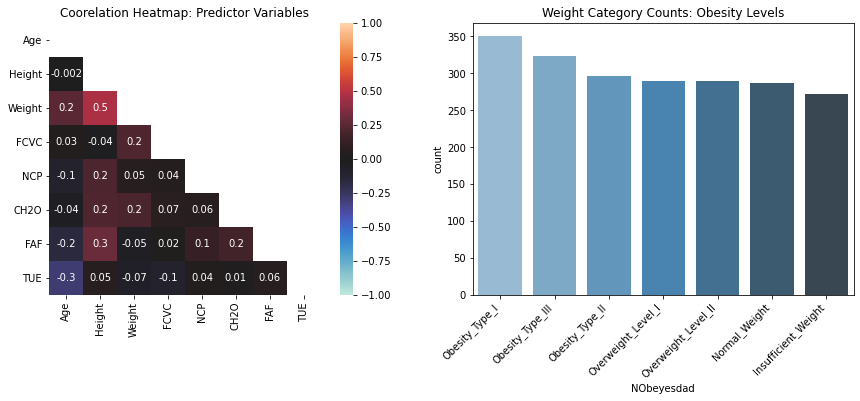

In [20]:
# Create figure
fig = plt.figure(figsize = (15, 5))

# Add subplot for one row 2 graphs first postion
ax1 = fig.add_subplot(121)

# Correlation data matrix
matrix = np.triu(ob_df.corr())

# Set title 
ax1.title.set_text("Coorelation Heatmap: Predictor Variables")

# Define plot
sns.heatmap(ob_df.corr(), 
                 mask = matrix,
                 annot = True,                 
                 fmt = '.1g',  
                 vmin = -1, vmax = 1, center = 0,                 
                 square = "True",
                 ax = ax1)

# Add second subplot
ax2 = fig.add_subplot(122)

# Rotate axis label
ax2.set_xticklabels(rotation = 45, horizontalalignment = 'right', labels = ob_df.NObeyesdad)

# Set title text
ax2.title.set_text("Weight Category Counts: Obesity Levels")

# Define second plot
sns.countplot(x = "NObeyesdad",                  
                 palette = "Blues_d", 
                 order = ob_df.NObeyesdad.value_counts().index,
                 ax = ax2,
                 data = ob_df)

<AxesSubplot:xlabel='NObeyesdad_'>

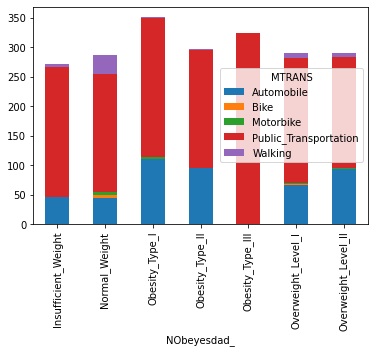

In [21]:
pd.DataFrame(ob_df[["MTRANS", "NObeyesdad"]].groupby("MTRANS")["NObeyesdad"].value_counts().rename_axis(["MTRANS", 'NObeyesdad_'])).reset_index().pivot(index = 'NObeyesdad_', columns = 'MTRANS', values = 'NObeyesdad').plot(kind = "bar",stacked = True)

<AxesSubplot:xlabel='NObeyesdad_'>

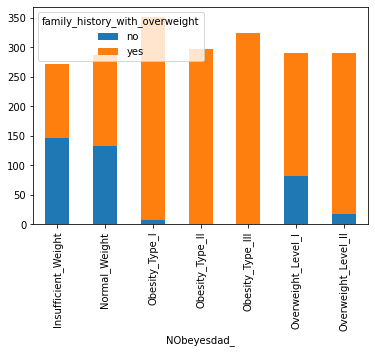

In [22]:
pd.DataFrame(ob_df[["family_history_with_overweight", "NObeyesdad"]].groupby("family_history_with_overweight")["NObeyesdad"].value_counts().rename_axis(["family_history_with_overweight", 'NObeyesdad_'])).reset_index().pivot(index = 'NObeyesdad_', columns = 'family_history_with_overweight', values = 'NObeyesdad').plot(kind = "bar",stacked = True)

## Extracting significant variables for Clustering

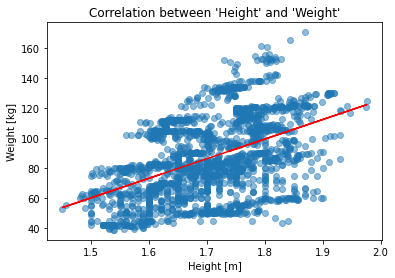

In [23]:
plt.scatter(ob_df["Height"], ob_df["Weight"], alpha = 0.5)
m, b = np.polyfit(ob_df["Height"], ob_df["Weight"], 1)
plt.plot(ob_df["Height"], m * ob_df["Height"] + b, color = "red")

plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
plt.title("Correlation between 'Height' and 'Weight'")
plt.show()

The code line above plots each person's weight and height. The red line shows that there is a positive correlation between them, which means an increase in one variable leads to an increase in the other. In other words, taller people are more likely to weight more.

In [24]:
# Categorical variables are one-hot encoded with get_dummies()
# Labels (i.e., the column holding information if a person is overweight/obese or not) are stored in separate variable; 
ob_dummies = pd.get_dummies(ob_df[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])
ob_numeric = ob_df[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]
ob_lab = ob_df[["NObeyesdad"]]

ob_con = pd.concat([ob_numeric, ob_dummies, ob_lab], axis = 1)

# All three sets - numeric features, one-hot encoded ones, and labels are concatenated in a new DataFrame. 
# It has 32 columns 
ob_con

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,21.000000,1.620000,64.000000,2.0,3.000000,2.000000,0.000000,1.000000,1,0,...,0,0,0,1,0,0,0,1,0,Normal_Weight
1,21.000000,1.520000,56.000000,3.0,3.000000,3.000000,3.000000,0.000000,1,0,...,0,0,1,0,0,0,0,1,0,Normal_Weight
2,23.000000,1.800000,77.000000,2.0,3.000000,2.000000,2.000000,1.000000,0,1,...,0,1,0,0,0,0,0,1,0,Normal_Weight
3,27.000000,1.800000,87.000000,3.0,3.000000,2.000000,2.000000,0.000000,0,1,...,0,1,0,0,0,0,0,0,1,Overweight_Level_I
4,22.000000,1.780000,89.800000,2.0,2.146845,2.000000,0.000000,0.000000,0,1,...,0,0,1,0,0,0,0,1,0,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.000000,1.728139,1.676269,0.906247,1,0,...,0,0,1,0,0,0,0,1,0,Obesity_Type_III
2107,21.982942,1.748584,133.742943,3.0,3.000000,2.005130,1.341390,0.599270,1,0,...,0,0,1,0,0,0,0,1,0,Obesity_Type_III
2108,22.524036,1.752206,133.689352,3.0,3.000000,2.054193,1.414209,0.646288,1,0,...,0,0,1,0,0,0,0,1,0,Obesity_Type_III
2109,24.361936,1.739450,133.346641,3.0,3.000000,2.852339,1.139107,0.586035,1,0,...,0,0,1,0,0,0,0,1,0,Obesity_Type_III


In [25]:
# Features and labels are separated and stored in different variables
ob_label = ob_con["NObeyesdad"]
ob_features = ob_con.drop("NObeyesdad", axis = 1)
ob_label

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [26]:
ob_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   Gender_Female                       2111 non-null   uint8  
 9   Gender_Male                         2111 non-null   uint8  
 10  family_history_with_overweight_no   2111 non-null   uint8  
 11  family_history_with_overweight_yes  2111 no

In [27]:
# Machine Learning algorithms work best with floating point numbers. 
# For this reason, all values are converted into floats.
ob_features = ob_features.astype("float")
ob_features.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                         float64
Gender_Male                           float64
family_history_with_overweight_no     float64
family_history_with_overweight_yes    float64
FAVC_no                               float64
FAVC_yes                              float64
CAEC_Always                           float64
CAEC_Frequently                       float64
CAEC_Sometimes                        float64
CAEC_no                               float64
SMOKE_no                              float64
SMOKE_yes                             float64
SCC_no                                float64
SCC_yes                           

In [28]:
# Values in all features should be in the same range. 
# Otherwise, the algorithm might misinterpret and assign them wrong coefficients (weights). 
# Obesity features are scaled with MinMaxScaler() which makes all values between 0 and 1.

ob_features_scaled = MinMaxScaler().fit_transform(ob_features)
ob_features_scaled.min(axis = 1), ob_features_scaled.max(axis = 1)

(array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]))

In [29]:
# ML classification algorithms expect labels with numeric values (and not strings).
# For this reason, obesity class is encoded with LabelEncoder(). 
# The latter replaces each class with an integer.

encoder = LabelEncoder()
encoder.fit(ob_label)
list(encoder.classes_)

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

In [30]:
# First, the encoder is instantiated. Then, it "overviews" the data. 
# transform() encodes the classes and assigns them the respective number.

ob_labels_encoded = encoder.transform(ob_label)
ob_labels_encoded

array([1, 1, 1, ..., 4, 4, 4])

In [31]:
# Cross validation is used to address the problem of dataset is small  
# Splitting function (train_test_split) shuffles the data and reserves 20% for testing

ob_features_tr, ob_features_ts, ob_labels_tr, ob_labels_ts = train_test_split(
                ob_features, ob_labels_encoded, 
                test_size = 0.2, stratify = ob_labels_encoded,
                random_state = 42)

In [32]:
ob_features_tr.shape, ob_labels_tr.shape, ob_features_ts.shape, ob_labels_ts.shape

((1688, 31), (1688,), (423, 31), (423,))

In [33]:
# Counter tells how many examples are placed in each class.

print(Counter(ob_labels_tr))
print(Counter(ob_labels_ts))

Counter({2: 281, 4: 259, 3: 237, 5: 232, 6: 232, 1: 229, 0: 218})
Counter({2: 70, 4: 65, 3: 60, 1: 58, 6: 58, 5: 58, 0: 54})


In [34]:
# Implementing a decision tree classifier to understand the most important features

dtree = DecisionTreeClassifier(max_depth = 13, random_state = 42)

In [35]:
# Metrics evaluation

def train_predict_score(estimator, train_features, train_labels, test_features, test_labels):
    """
    Function: Trains model, predict classes and computes accuracy and f1 score.
    
    Parameters: estimator, X_train, y_train, X_test, y_test.
    """
    estimator.fit(train_features, train_labels)
    
    print(f"Accuracy on Test data: {accuracy_score(test_labels, estimator.predict(test_features))}")
    print(f"F1 on Test data: {f1_score(test_labels, estimator.predict(test_features), average = 'weighted')}")

In [36]:
train_predict_score(dtree, ob_features_tr, ob_labels_tr, ob_features_ts, ob_labels_ts)

Accuracy on Test data: 0.91725768321513
F1 on Test data: 0.9179945536710599


[Text(903.0591846113444, 1041.9, 'Weight <= 99.568\ngini = 0.856\nsamples = 1688\nvalue = [218, 229, 281, 237, 259, 232, 232]\nclass = Overweight_Level_II'),
 Text(519.5532431722688, 951.3000000000001, 'Weight <= 60.059\ngini = 0.801\nsamples = 1106\nvalue = [218, 229, 193, 4, 0, 232, 230]\nclass = Obesity_Type_II'),
 Text(201.48371848739495, 860.7, 'Height <= 1.66\ngini = 0.479\nsamples = 336\nvalue = [215, 112, 0, 0, 0, 8, 1]\nclass = Normal_Weight'),
 Text(82.05882352941175, 770.1, 'Weight <= 46.828\ngini = 0.54\nsamples = 177\nvalue = [73, 95, 0, 0, 0, 8, 1]\nclass = Overweight_Level_I'),
 Text(23.445378151260503, 679.5, 'Height <= 1.515\ngini = 0.149\nsamples = 74\nvalue = [68, 6, 0, 0, 0, 0, 0]\nclass = Normal_Weight'),
 Text(11.722689075630251, 588.9, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0, 0, 0]\nclass = Overweight_Level_I'),
 Text(35.168067226890756, 588.9, 'MTRANS_Automobile <= 0.5\ngini = 0.081\nsamples = 71\nvalue = [68, 3, 0, 0, 0, 0, 0]\nclass = Normal_Weight'),

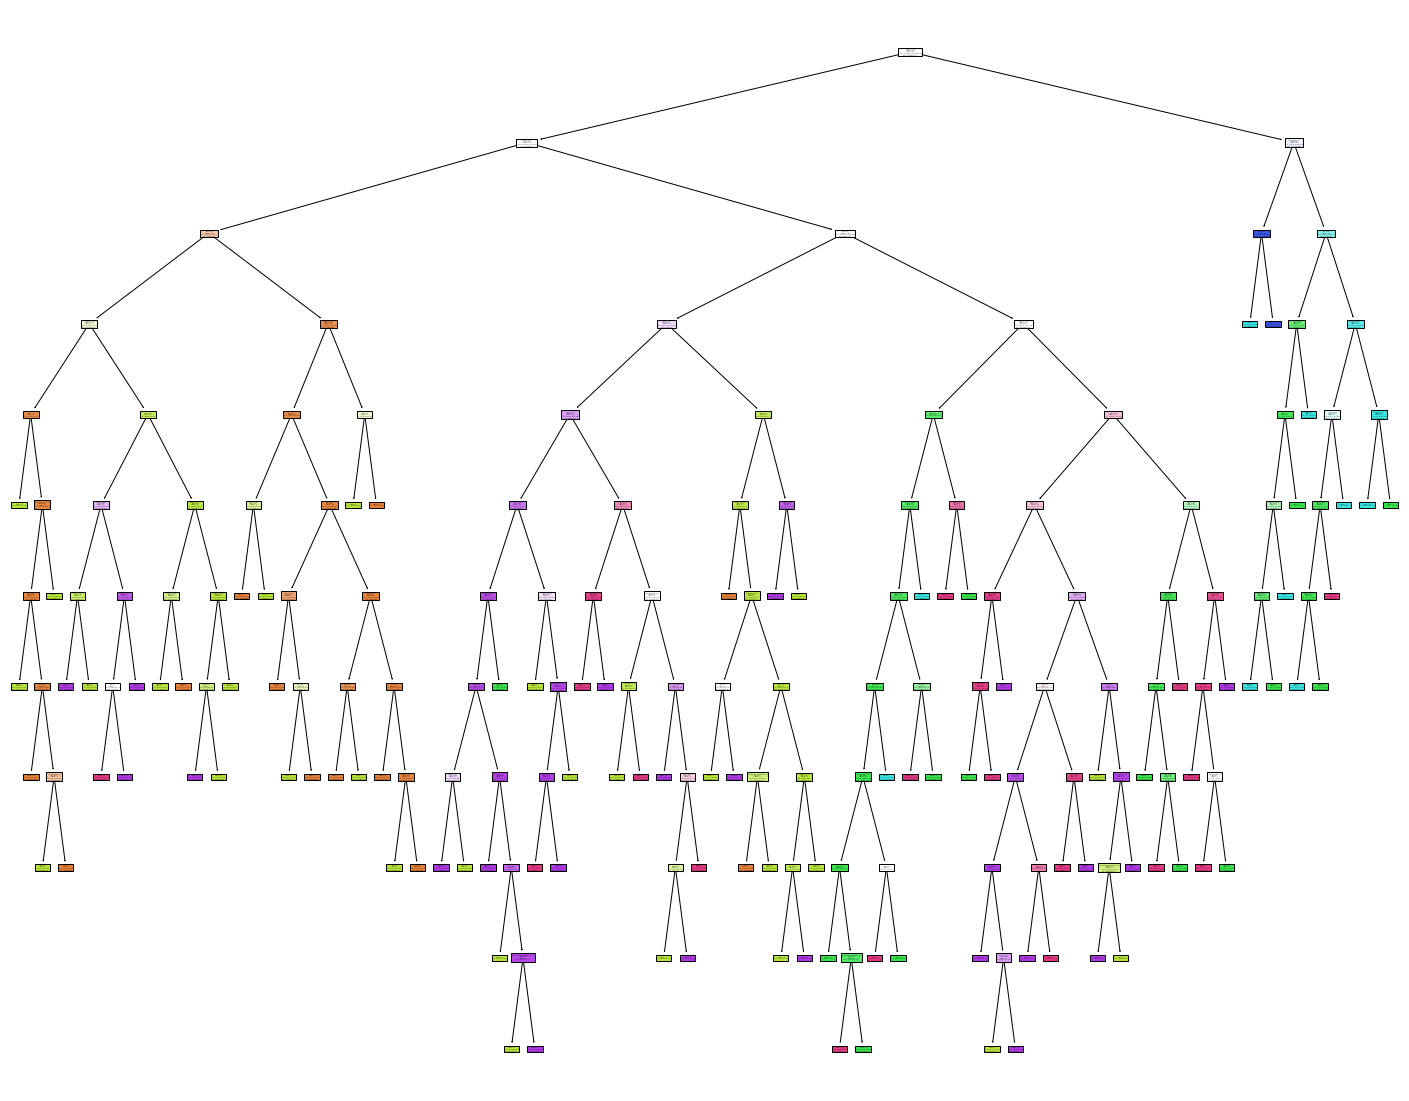

In [37]:
# Visulaizing a decision tree

fig = plt.figure(figsize = (25, 20))
tree.plot_tree(dtree, feature_names = ob_features.columns,  
                   class_names = ob_label
               
               .unique(),filled = True)

In [38]:
dtree.classes_

array([0, 1, 2, 3, 4, 5, 6])

In [39]:
list(encoder.classes_)

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

In [40]:
dtree.feature_importances_

array([0.04023473, 0.22089836, 0.47535607, 0.01449279, 0.00533957,
       0.00468755, 0.00238834, 0.01124707, 0.        , 0.15792882,
       0.00103791, 0.00128503, 0.02176254, 0.        , 0.0026822 ,
       0.00157633, 0.00622633, 0.        , 0.00136884, 0.00121089,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02602915, 0.00197948, 0.        , 0.        , 0.00226802,
       0.        ])

In [41]:
# Labels (i.e., the column holding information if a person is overweight/obese or not) are stored in separate variable; 
ob_dummies = pd.get_dummies(ob_df[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])
ob_numeric = ob_df[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]

# Create a new feature 'Obese' based on BMI Calculation
ob_df["Obese"] = np.where((ob_df["Weight"] / (ob_df["Height"] * ob_df["Height"])) > 30, 1, 0)
ob_lab = ob_df[["Obese"]]
ob_con = pd.concat([ob_numeric, ob_dummies, ob_lab], axis = 1)

# Features and labels are separated and stored in different variables
ob_label = ob_con["Obese"]
ob_features = ob_con.drop("Obese", axis = 1)

# Machine Learning algorithms work best with floating point numbers. 
ob_features = ob_features.astype("float")
ob_features.dtypes

# Obesity features are scaled with MinMaxScaler() which makes all values between 0 and 1.
ob_features_scaled = MinMaxScaler().fit_transform(ob_features)
ob_features_scaled.min(axis = 1), ob_features_scaled.max(axis = 1)

# ML classification algorithms expect labels with numeric values (and not strings).
encoder = LabelEncoder()
encoder.fit(ob_label)
list(encoder.classes_)

#First, the encoder is instantiated. Then, it "overviews" the data. 
ob_labels_encoded = encoder.transform(ob_label)
ob_labels_encoded


# Cross validation is used to address the problem of dataset is small  
# Splitting function (train_test_split) shuffles the data and reserves 20% for testing

ob_features_tr, ob_features_ts, ob_labels_tr, ob_labels_ts = train_test_split(
                ob_features, ob_labels_encoded, 
                test_size = 0.2, stratify = ob_labels_encoded,
                random_state = 42)
                
ob_features_tr.shape, ob_labels_tr.shape, ob_features_ts.shape, ob_labels_ts.shape

((1688, 31), (1688,), (423, 31), (423,))

## Finding the appropriate K based on Elbow Method

Text(0, 0.5, 'WCSS')

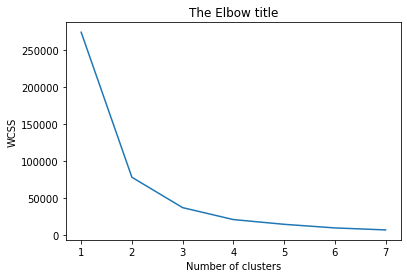

In [42]:
ob_features_ts2 = ob_features_ts.iloc[:, [1 , 2]]
ob_features_ts2

wcss = []
for i in range(1, 8):
    kmeans = KMeans(i)
    kmeans.fit(ob_features_ts2)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1, 8)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Here, we find that the k=2 is the bend(elbow) point.

## Finding the appropriate K based on Silhouette Method

[0.6207690262264232, 0.6003355470459559, 0.5907881529598206, 0.5761955044614899, 0.5620591066630507, 0.583359019115667]


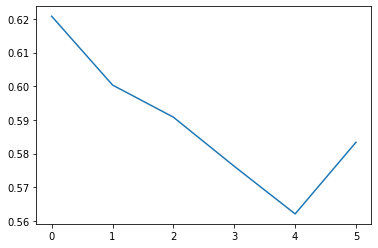

In [43]:
sil = []
# Number of clusters in range 2-10
K = range(2, 8)
for n in K:
    kmeans = KMeans(n_clusters = n).fit(ob_features_ts2)
    labels = kmeans.labels_
    sil.append(silhouette_score(ob_features_ts2, labels, metric = 'euclidean'))
plt.plot(sil)
print(sil)

Here, we can easily visualize the peak point at k=2

# Modelling - K-Means Clustering

In [44]:
# Instantiating requires setting the number of clusters to form, as well as the number of centroids to generate. 
# Number of clusters is known: 2, based on BMI. 
# "K-means++" is the chosen method for initialization - it selects initial cluster centers in a smart way to speed up convergence.

kmeans = KMeans(n_clusters = 2, init = "k-means++")

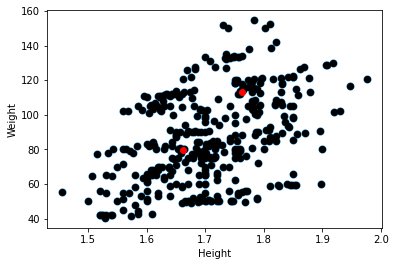

In [45]:
X, y_true = make_blobs(n_samples = 300, centers = 4,
                       cluster_std = 0.60, random_state = 0)
plt.scatter(ob_features_ts['Height'], ob_features_ts['Weight'], s = 50);

K=2

# Select random observation as centroids
Centroids = (ob_df.sample(n = K))
plt.scatter(ob_features_ts["Height"], ob_features_ts["Weight"], c = 'black')
plt.scatter(Centroids["Height"], Centroids["Weight"], c = 'red')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Only the most important features (i.e., those holding the most valuable information) are taken to represent the visualization. 

DecisionTreeClassifier() found that the second ("Height") and the third ("Weight") columns are the most important ones.

They bear 21.9% and 47.85%, respectively, of the information in the data. 

In [46]:
predicted_labels = kmeans.fit_predict(ob_features_ts)
predicted_labels

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,

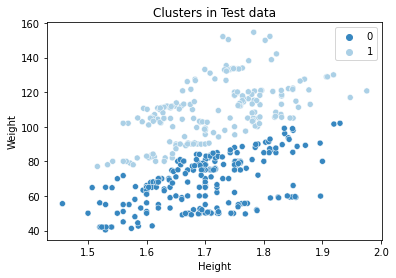

In [47]:
# Clusters (formed by "Height" and "Weight" features) in the testing data according to their real labels are plotted below.

def plot_clusters(dataset, feature_one, feature_two, labels, title = None):
    """
    Function: Computes and displays clusters.
    
    Parameters: dataset, 2 features, cluster indicator.
    """
    sns.scatterplot(data = dataset, x = feature_one, y = feature_two, hue = labels, palette = "Blues_r")
    if title is not None:
        plt.title(title)
    plt.show()
plot_clusters(ob_features_ts, "Height", "Weight", ob_labels_ts, "Clusters in Test data")

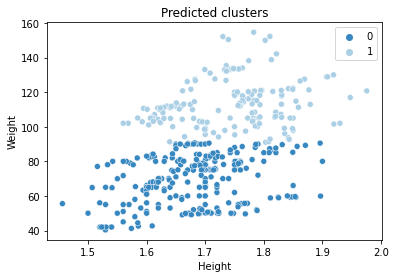

In [48]:
plot_clusters(ob_features_ts, "Height", "Weight", predicted_labels, "Predicted clusters")

A person's height and weight are the most important factors determining his/her obesity status. Other factors might also play a role, e.g., eating habits and physical activity.

### Various metric for evaluation of model and cluster 

In [49]:
metrics.homogeneity_score(ob_labels_ts, predicted_labels)

0.5188945308637445

In [50]:
metrics.completeness_score(ob_labels_ts, predicted_labels)

0.5300284945006847

In [51]:
metrics.v_measure_score(ob_labels_ts, predicted_labels)

0.5244024210504785

In [52]:
silhouette_score(ob_features_ts2, labels, metric = 'euclidean')

0.583359019115667

### Accuracy of the K-Means models with actual label value

In [53]:
ob_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Obese
0,21.000000,1.620000,64.000000,2.0,3.000000,2.000000,0.000000,1.000000,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight,0
1,21.000000,1.520000,56.000000,3.0,3.000000,3.000000,3.000000,0.000000,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight,0
2,23.000000,1.800000,77.000000,2.0,3.000000,2.000000,2.000000,1.000000,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight,0
3,27.000000,1.800000,87.000000,3.0,3.000000,2.000000,2.000000,0.000000,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I,0
4,22.000000,1.780000,89.800000,2.0,2.146845,2.000000,0.000000,0.000000,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.000000,1.728139,1.676269,0.906247,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,1
2107,21.982942,1.748584,133.742943,3.0,3.000000,2.005130,1.341390,0.599270,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,1
2108,22.524036,1.752206,133.689352,3.0,3.000000,2.054193,1.414209,0.646288,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,1
2109,24.361936,1.739450,133.346641,3.0,3.000000,2.852339,1.139107,0.586035,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,1


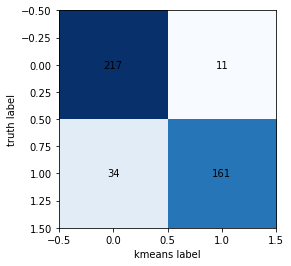

In [54]:
# Compute confusion matrix
cm = confusion_matrix(ob_labels_ts, predicted_labels)

# Plot confusion matrix
plt.imshow(cm,interpolation = 'none', cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha = 'center', va = 'center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show()

In [55]:
print(classification_report(ob_labels_ts, predicted_labels))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91       228
           1       0.94      0.83      0.88       195

    accuracy                           0.89       423
   macro avg       0.90      0.89      0.89       423
weighted avg       0.90      0.89      0.89       423



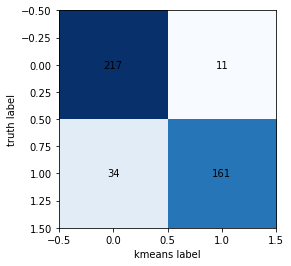

              precision    recall  f1-score   support

           0       0.86      0.95      0.91       228
           1       0.94      0.83      0.88       195

    accuracy                           0.89       423
   macro avg       0.90      0.89      0.89       423
weighted avg       0.90      0.89      0.89       423



In [56]:
kmeans = KMeans(n_clusters = 0, init = "k-means++")

# Compute confusion matrix
cm = confusion_matrix(ob_labels_ts, predicted_labels)

# Plot confusion matrix
plt.imshow(cm,interpolation = 'none', cmap = 'Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha = 'center', va = 'center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show()

print(classification_report(ob_labels_ts, predicted_labels))

In [57]:
score = metrics.accuracy_score(ob_labels_ts, predicted_labels)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.893617
